In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import statsmodels.api as stats
from ast import literal_eval

# An Analysis of Movie Performance, Part 2: Data Analysis and Presentation

In this part, you’ll use the datasets you gathered in Part 1 to explore what makes a movie successful. You’ll perform exploratory data analysis, create visualizations, and, where appropriate, fit simple statistical models.

The main goal is to discover patterns and communicate them clearly, not just to crunch numbers.

**Learning Objectives**  
By the end of this part, you should be able to:  
* Combine and clean multiple real-world datasets from different sources.  
* Conduct exploratory data analysis (EDA) with pandas and visualization libraries.  
* Apply basic statistical modeling to test hypotheses.  
* Communicate insights effectively to a non-technical audience.

1. **Exploratory Analysis**  
Begin by understanding your dataset as a whole. Look for trends, outliers, and relationships.  

    Examples of questions to explore:  
    * How popular is each genre over the last decade?
    * How do budget and revenue vary by year or by genre?  
    * What is the average profit margin (revenue - budget) across genres or years?  
    * How do movie ratings (vote average) relate to box-office performance?  
    * Adjust all financial metrics (budget and revenue) for inflation to 2024 dollars using CPI data.

    Deliverables:  
    * At least 3-4 clearly labeled visualizations (bar charts, scatter plots, or boxplots).  

In [2]:
# read in csv files
best_picture = pd.read_csv('best_picture.csv')
movies_2015_2024 = pd.read_csv('movies_2015_2024.csv')

In [3]:
# inspect dataframe
best_picture.shape

(611, 3)

In [4]:
# inspect dataframe
movies_2015_2024.shape

(1000, 9)

In [5]:
best_picture.head(2)

,Year,Film,Winner
0,1927,Wings,Yes
1,1927,7th Heaven,No


In [6]:
movies_2015_2024.head(2)

,title,vote_average,vote_count,budget,revenue,imdb_id,id,movie_genres,release_year
0,#Alive,7.227,1955,6300000,13416285,tt10620868,614696,"['Action', 'Horror', 'Science Fiction']",2020
1,10 Cloverfield Lane,6.994,8359,15000000,110216998,tt1179933,333371,"['Thriller', 'Science Fiction', 'Drama', 'Horr...",2016


In [7]:
# rename columns
best_picture_rename = best_picture.rename(columns={
    "Year": "release_year",
    "Film": "title"
})

# merge dataframes and keep all movies
merged = movies_2015_2024.merge(
    best_picture_rename[["release_year", "title", "Winner"]],
    on=["release_year", "title"],
    how="left"
)

# fill in missing winner values with no
merged["Winner"] = merged["Winner"].fillna("No")

# display merged dataframe
merged.head(2)

,title,vote_average,vote_count,budget,revenue,imdb_id,id,movie_genres,release_year,Winner
0,#Alive,7.227,1955,6300000,13416285,tt10620868,614696,"['Action', 'Horror', 'Science Fiction']",2020,No
1,10 Cloverfield Lane,6.994,8359,15000000,110216998,tt1179933,333371,"['Thriller', 'Science Fiction', 'Drama', 'Horr...",2016,No


> ## CPI Adjustment
>
> 
> In this project we have collected **revenue and budget data** for multiple years. In order to substansiate that growth by **todays financial landscape** we must adjust each individual value. We can make these changes by adjusting for **CPI growth**. Below, I have added a calculation to create a multiplier variable. This can be applied to each year and each value. These average CPI values come from [The Federal Reserve of Minneapolis](https://www.minneapolisfed.org/about-us/monetary-policy/inflation-calculator/consumer-price-index-1913-) **Last Acessed: November 19, 2025**
>
> 
>* Make changes that account for **inflation**.
>* Calculate CPI adjustments.
>* Create **adjusted budget and revenue** columns.

In [8]:
# create copy of merged data for cpi calculations
merged_cpi = merged

In [9]:
# calculate CPI multipliers based off 2024 CPI
cpi_calculation = {
    2015: (313.7 / 237.0),
    2016: (313.7 / 240.0),
    2017: (313.7 / 245.1),
    2018: (313.7 / 251.1),
    2019: (313.7 / 255.7),
    2020: (313.7 / 258.8),
    2021: (313.7 / 271.0),
    2022: (313.7 / 292.7),
    2023: (313.7 / 304.7),
    2024: (313.7 / 313.7),
}

# loop through list and round each value
for year, value in cpi_calculation.items():
    print(year, f"{value:.2f}")

2015 1.32
2016 1.31
2017 1.28
2018 1.25
2019 1.23
2020 1.21
2021 1.16
2022 1.07
2023 1.03
2024 1.00


In [10]:
# create multiplier element for mapping columns
cpi_multiplier = {
    2015: 1.32,
    2016: 1.31,
    2017: 1.28,
    2018: 1.25,
    2019: 1.23,
    2020: 1.21,
    2021: 1.16,
    2022: 1.07,
    2023: 1.03,
    2024: 1.00
}

In [11]:
# map multiplier values in new column
merged_cpi['cpi_multiplier'] = merged_cpi['release_year'].map(cpi_multiplier)

# add adjusted CPI revenue and budget columns
merged_cpi['budget_2024'] = merged_cpi['budget'] * merged_cpi['cpi_multiplier']
merged_cpi['revenue_2024'] = merged_cpi['revenue'] * merged_cpi['cpi_multiplier']

# display adjusted dataframe
merged_cpi.head()

,title,vote_average,vote_count,budget,revenue,imdb_id,id,movie_genres,release_year,Winner,cpi_multiplier,budget_2024,revenue_2024
0,#Alive,7.227,1955,6300000,13416285,tt10620868,614696,"['Action', 'Horror', 'Science Fiction']",2020,No,1.21,7623000.0,1.623370e+07
1,10 Cloverfield Lane,6.994,8359,15000000,110216998,tt1179933,333371,"['Thriller', 'Science Fiction', 'Drama', 'Horr...",2016,No,1.31,19650000.0,1.443843e+08
2,12 Strong,6.300,3096,35000000,67450815,tt1413492,429351,"['War', 'Drama', 'Action', 'History']",2018,No,1.25,43750000.0,8.431352e+07
3,13 Hours: The Secret Soldiers of Benghazi,7.269,3789,50000000,69411370,tt4172430,300671,"['War', 'Action', 'History', 'Drama', 'Thriller']",2016,No,1.31,65500000.0,9.092889e+07
4,1917,7.986,13091,100000000,446064352,tt8579674,530915,"['War', 'History', 'Drama', 'Action']",2019,No,1.23,123000000.0,5.486592e+08


2. **Performance Comparisons**  
    Use your merged dataset to examine whether recognition and awards are associated with better performance.  
    Investigate:  
    * Do Best Picture nominees or winners tend to earn higher box-office revenue than non-nominated movies?  
    * Are certain genres or types of roles more common among award-winning films?
    * (If you did the optional scrape) Do movies featuring a Best Actor or Best Actress winner in their cast tend to perform better?  
  
    Deliverables:  
    * At least one regression model 

In [12]:
# create dataframe with award winning movies
award_winners = merged[merged['Winner'] == 'Yes']
award_winners.head(2)

,title,vote_average,vote_count,budget,revenue,imdb_id,id,movie_genres,release_year,Winner,cpi_multiplier,budget_2024,revenue_2024
40,All Quiet on the Western Front,7.722,4376,20000000,0,tt1016150,49046,"['War', 'History', 'Drama']",2022,Yes,1.07,21400000.0,0.0
58,Anora,7.000,2729,6000000,56286295,tt28607951,1064213,"['Drama', 'Comedy', 'Romance']",2024,Yes,1.00,6000000.0,56286295.0


In [13]:
# create dataframe with non-award winning movies
non_award_winners = merged[merged['Winner'] == 'No']
non_award_winners.head(2)

,title,vote_average,vote_count,budget,revenue,imdb_id,id,movie_genres,release_year,Winner,cpi_multiplier,budget_2024,revenue_2024
0,#Alive,7.227,1955,6300000,13416285,tt10620868,614696,"['Action', 'Horror', 'Science Fiction']",2020,No,1.21,7623000.0,1.623370e+07
1,10 Cloverfield Lane,6.994,8359,15000000,110216998,tt1179933,333371,"['Thriller', 'Science Fiction', 'Drama', 'Horr...",2016,No,1.31,19650000.0,1.443843e+08


In [14]:
# generate percent difference in average revenue
(award_winners['revenue'].mean() - non_award_winners['revenue'].mean()) / award_winners['revenue'].mean()

np.float64(0.011985465683477832)

> ## Award Winning Movie Revenue
>
> 
> Here we observe the **revenue difference** in award winning movies and non-award winning movies. Award winning movies generate **1.2%** more annual revenue than non-award winning movies. This is valuable insight but a statistic model can measure correlation and would give a more accurate depiction.
>
> 
>* Award winning movies generate **1.2% more revenue on average.**
>* There is not a marginal difference in revenue based on awards.
>* A **statistical model** will reveal more information.

In [15]:
# create binary column for winning values 
merged_cpi_model_data = merged_cpi
merged_cpi_model_data['winner_binary'] = merged_cpi_model_data['Winner'].map({'Yes': 1, 'No': 0})

In [16]:
# create object to filter dataframe
valid_titles = best_picture['Film']
valid_years = best_picture['Year']

In [17]:
# filter dataframe for movies with award winning entries
filtered_movies_w_award_entry = merged_cpi_model_data[
    merged_cpi_model_data['title'].isin(valid_titles) & 
    merged_cpi_model_data['release_year'].isin(valid_years)
]

In [18]:
# show correlation between variables
filtered_movies_w_award_entry[['winner_binary', 'revenue_2024']].corr()

,winner_binary,revenue_2024
winner_binary,1.000000,-0.059594
revenue_2024,-0.059594,1.000000


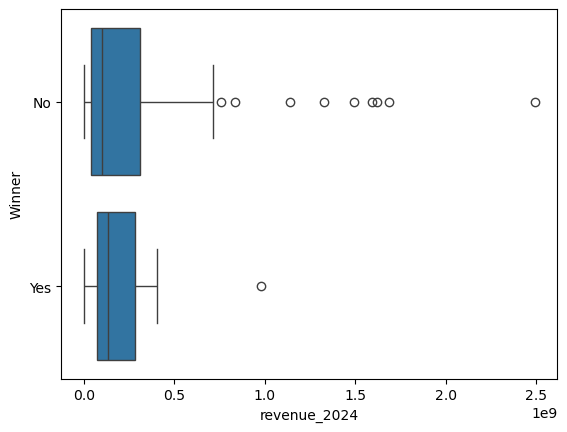

In [19]:
# visualize average revenue for award and non-award winning movies
sns.boxplot(y='Winner', x='revenue_2024', data=filtered_movies_w_award_entry);

In [20]:
# create copy to explode
merged_copy = merged

In [21]:
# convert column to list for explode
merged_copy['movie_genres'] = merged_copy['movie_genres'].apply(literal_eval)

In [22]:
# expand genres and display dataframe
merged_genre_explode = merged_copy.explode('movie_genres')
merged_genre_explode.head()

,title,vote_average,vote_count,budget,revenue,imdb_id,id,movie_genres,release_year,Winner,cpi_multiplier,budget_2024,revenue_2024,winner_binary
0,#Alive,7.227,1955,6300000,13416285,tt10620868,614696,Action,2020,No,1.21,7623000.0,1.623370e+07,0
0,#Alive,7.227,1955,6300000,13416285,tt10620868,614696,Horror,2020,No,1.21,7623000.0,1.623370e+07,0
0,#Alive,7.227,1955,6300000,13416285,tt10620868,614696,Science Fiction,2020,No,1.21,7623000.0,1.623370e+07,0
1,10 Cloverfield Lane,6.994,8359,15000000,110216998,tt1179933,333371,Thriller,2016,No,1.31,19650000.0,1.443843e+08,0
1,10 Cloverfield Lane,6.994,8359,15000000,110216998,tt1179933,333371,Science Fiction,2016,No,1.31,19650000.0,1.443843e+08,0


In [23]:
# filter for award winning movies
winning_genre_explode = merged_genre_explode[merged_genre_explode['Winner'] == 'Yes']

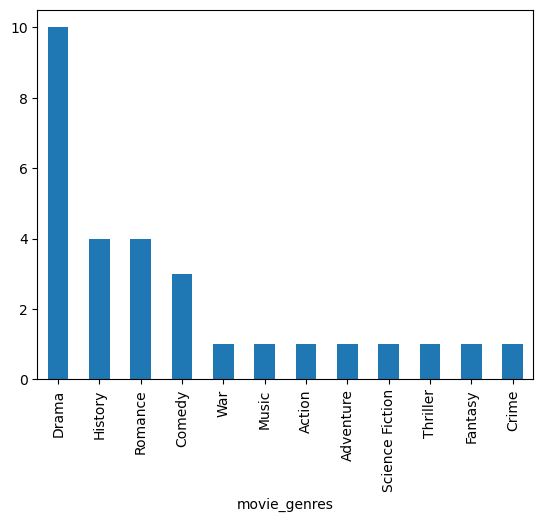

In [24]:
# visualize occurences of genre in award winning movies 
winning_genre_explode['movie_genres'].value_counts().plot(kind='bar');

3. **Presentation**  
    Prepare a 10-12 minute presentation of your findings.  
    Your presentation should:  
    * Focus on findings and insights, not code.  
    * Tell a clear story: the questions you asked and what you found.  
    * Include visuals such as charts, summary tables, or model results.
    * Avoid screenshots of code or raw output. Think of your audience as studio executives or film analysts, not programmers.

    Your presentation should be done using PowerPoint/Google Slides or other presentation software.